In [2]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("/content/modified_placement_data.csv")

In [43]:
df

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
95,"4,3",200.0,No
96,"4,4",42.0,No
97,"6,7",182.0,Yes
98,"6,3",103.0,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [45]:
df["cgpa"] = df["cgpa"].str.replace(",",".")

In [46]:
df

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No
...,...,...,...
95,4.3,200.0,No
96,4.4,42.0,No
97,6.7,182.0,Yes
98,6.3,103.0,Yes


In [47]:
df.info() # values of columns are changed into string type so needs to make them numeric gain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


To correct the 'cgpa' column, I'll replace the commas with periods and convert the column to a numeric type.

In [48]:
df['cgpa'] = df['cgpa'].str.replace(',', '.', regex=False).astype(float)
display(df.head())

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No


There are a few other ways to handle this, though the method used is quite common and efficient. Here are some alternatives:

1. Using `pd.to_numeric` with `decimal=','`: You can directly use pd.to_numeric and specify the decimal separator. This is often more concise than using `.str.replace()` first.

```df['cgpa'] = pd.to_numeric(df['cgpa'], decimal=',')```
2. Using apply with a lambda function: You could use the `.apply()` method to apply a function to each element in the column. While flexible, this is generally less performant for this specific task than vectorized string operations or `pd.to_numeric.`

``` df['cgpa'] = df['cgpa'].apply(lambda x: float(x.replace(',', '.')))```
3. Reading the CSV with decimal=',': The most efficient method, if you are reading the data from a CSV file where the decimal separator is consistently a comma, is to specify the decimal parameter directly in pd.read_csv.

```df = pd.read_csv("/content/modified_placement_data.csv", decimal=',')```


Each method has its own advantages depending on the specific situation and the size of your dataset. For this particular case, using pd.to_numeric with decimal=',' or specifying the decimal when reading the CSV would be equally good, if not better, alternatives.

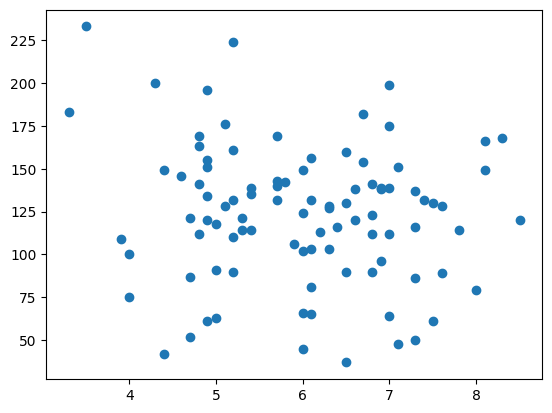

In [49]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["iq"])

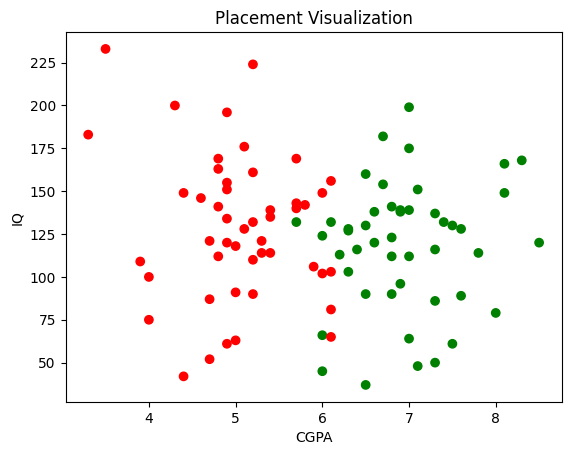

In [50]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define your custom colors for each category
color_map = ListedColormap(["red", "green"])  # e.g., "No" → red, "Yes" → green

# Map categories to integers (just for coloring, not modifying the DataFrame)
placement_colors = df["placement"].map({"No": 0, "Yes": 1})

# Plot with the custom colormap
plt.scatter(df["cgpa"], df["iq"], c=placement_colors, cmap=color_map)

# Optional: Add labels
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Placement Visualization")

plt.show()

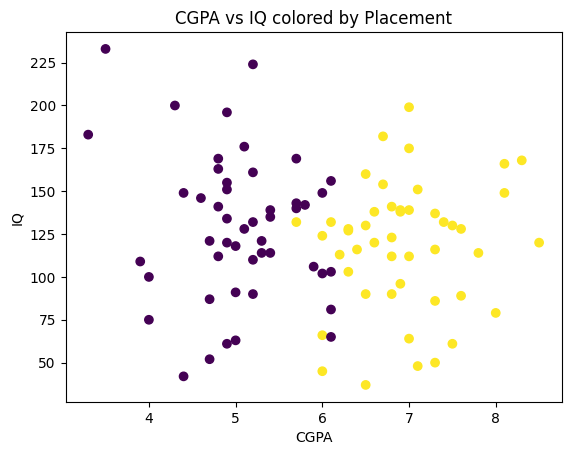

In [51]:
df['placement_numeric'] = df['placement'].apply(lambda x: 1 if x == 'Yes' else 0)
plt.scatter(df["cgpa"],df["iq"],c= df["placement_numeric"])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("CGPA vs IQ colored by Placement")
plt.show()

In [52]:
df

,cgpa,iq,placement,placement_numeric
0,6.8,123.0,Yes,1
1,5.9,106.0,No,0
2,5.3,121.0,No,0
3,7.4,132.0,Yes,1
4,5.8,142.0,No,0
...,...,...,...,...
95,4.3,200.0,No,0
96,4.4,42.0,No,0
97,6.7,182.0,Yes,1
98,6.3,103.0,Yes,1


In [53]:
# Extracting independent and dependent columns

df = df.drop(columns = "placement")


In [54]:
df

,cgpa,iq,placement_numeric
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cgpa               95 non-null     float64
 1   iq                 100 non-null    float64
 2   placement_numeric  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


# There are 5 null values in cgpa

In [56]:
# Relacing them with the mean of CGPA

df["cgpa"] = df['cgpa'].fillna(df["cgpa"].mean())

In [57]:
df

,cgpa,iq,placement_numeric
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cgpa               100 non-null    float64
 1   iq                 100 non-null    float64
 2   placement_numeric  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [59]:
df.shape

(100, 3)

In [60]:
X = df.iloc[:,0:2]

In [61]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [62]:
y = df.iloc[:,-1]

In [63]:
y

,placement_numeric
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [65]:
# Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [66]:
X_train = scalar.fit_transform(X_train)

In [67]:
X_train

array([[-1.30954616,  0.62722943],
       [ 2.01048324,  0.62722943],
       [-0.41224092,  0.3795574 ],
       [-0.41224092,  0.28048858],
       [-0.86089354,  0.67676384],
       [ 0.12614223, -1.94855975],
       [ 1.29263904, -0.9331044 ],
       [ 0.12614223, -1.42844847],
       [ 0.11575238, -1.42844847],
       [-0.59170197,  0.92443588],
       [-0.14304935,  1.1225735 ],
       [ 0.11575238,  0.85013426],
       [ 0.21587275,  0.20618697],
       [ 0.12614223, -0.53682914],
       [-0.05331882,  0.45385901],
       [-1.66846826, -0.58636355],
       [-0.95062406, -0.2891571 ],
       [ 0.57479485, -2.14669737],
       [-1.04035459, -0.06625227],
       [-0.50197144, -0.06625227],
       [ 0.3953338 ,  0.10711816],
       [ 0.93371694,  0.3795574 ],
       [ 0.12614223,  0.00804934],
       [ 0.84398642,  0.4290918 ],
       [-0.95062406,  0.4290918 ],
       [-0.59170197,  0.20618697],
       [ 0.30560327, -0.2643899 ],
       [ 1.02344747, -1.47798288],
       [ 0.93371694,

In [68]:
X_test = scalar.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression()

In [71]:
# Model training
clf.fit(X_train,y_train)

LogisticRegression()

In [72]:
# Model evaluation

clf.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [73]:
y_test

,placement_numeric
26,1
41,0
44,1
77,1
30,1
73,0
52,1
92,0
70,1
79,1


In [74]:
y_pred = clf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [76]:
accuracy_score(y_test,y_pred)

0.95

In [78]:
#Visualizing decison boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

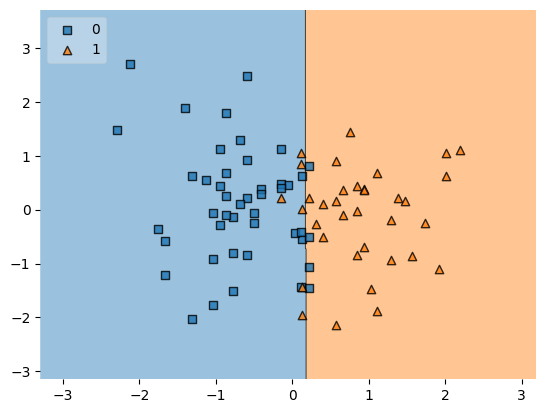

In [80]:
plot_decision_regions(X_train,y_train.values,clf = clf,legend=2)

This code visualizes the decision regions of the trained logistic regression model.

```plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)```: This function from the ```mlxtend.plotting``` library plots the decision boundary.
- ``X_train``: The training data features.
- ```y_train.values```: The training data labels (converted to a NumPy array).
- ```clf=clf```: The trained classifier (the logistic regression model in this case).
- ```legend=2```: Displays the legend.
This plot helps to understand how the model separates the data points based on the training data.

The ```plot_decision_regions``` function from the mlxtend library expects the input features (X) to be a NumPy array and the labels (y) to be a 1D NumPy array or similar.

When we applied ```StandardScaler().fit_transform(X_train)```, the output X_train became a NumPy array. However, y_train is still a pandas Series. To meet the requirements of ```plot_decision_regions``` for the labels, we needed to convert the y_train pandas Series into a NumPy array using ```.values```.

In [81]:
import pickle

In [82]:
pickle.dump(clf,open("model.pkl","wb"))